# loan data classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [2]:
# loans_tr 데이터를 load
dataset = pd.read_csv('loans_tr.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [4]:
dataset.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
dataset.shape

(8578, 15)

In [6]:
dataset.describe()

,Unnamed: 0,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8.578000e+03,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000
mean,4798.572511,0.803567,0.122617,318.093373,10.932431,12.622325,710.749709,4547.756538,1.706579e+04,46.757076,1.571695,0.164607,0.062252,0.159594
std,2766.006017,0.397323,0.026817,206.994270,0.615859,6.881663,38.088227,2494.931515,3.450448e+04,29.000330,2.197341,0.550745,0.264656,0.366251
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2399.250000,1.000000,0.103900,163.570000,10.555813,7.242500,682.000000,2792.781250,3.193250e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,4804.500000,1.000000,0.122100,267.740000,10.928884,12.660000,707.000000,4110.041667,8.690000e+03,46.200000,1.000000,0.000000,0.000000,0.000000
75%,7193.500000,1.000000,0.140700,430.750000,11.294022,17.960000,737.000000,5729.958333,1.843375e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,9576.000000,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
del dataset['Unnamed: 0']
del dataset['purpose']

In [8]:
dataset.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
dataset.shape

(8578, 13)

In [10]:
# 0,1 이 현재 unbalanced 되어있는것을 확인할 수 있다.
print(dataset.groupby('not.fully.paid').size()) # 클래스간 분포를 확인할 수 있다. 

not.fully.paid
0    7209
1    1369
dtype: int64


# data visualization

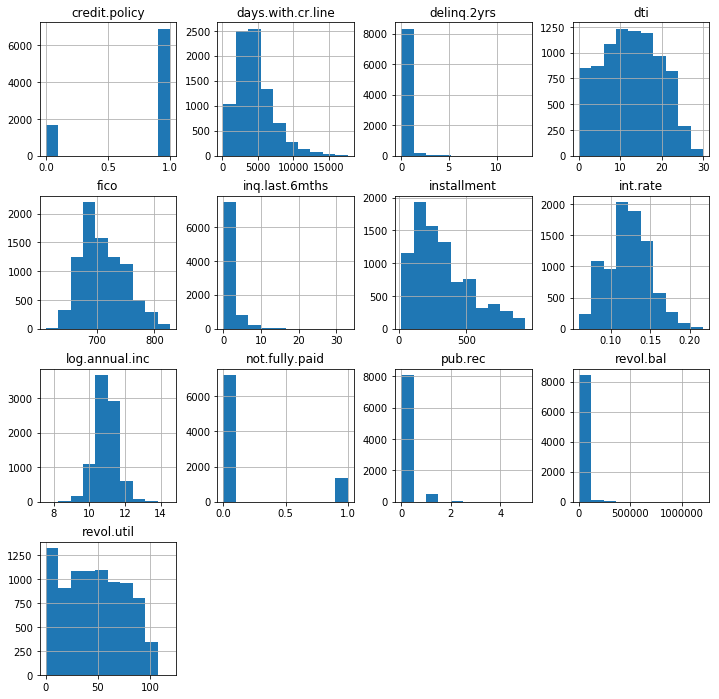

In [11]:
plt.rcParams['figure.figsize'] = (12,12) # figure 크기를 12,12 설정

# histograms
dataset.hist() # 각 컬럼별 히스토그램을 그린다.
plt.show() # 보여주기

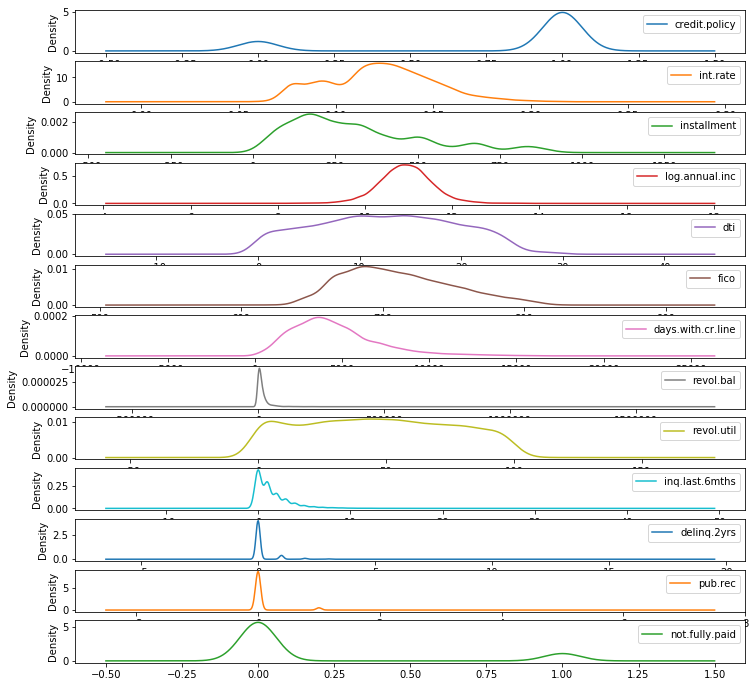

In [12]:
# 각 컬럼별 밀도를 확인
dataset.plot(kind='density', subplots=True, sharex=False)
plt.show()

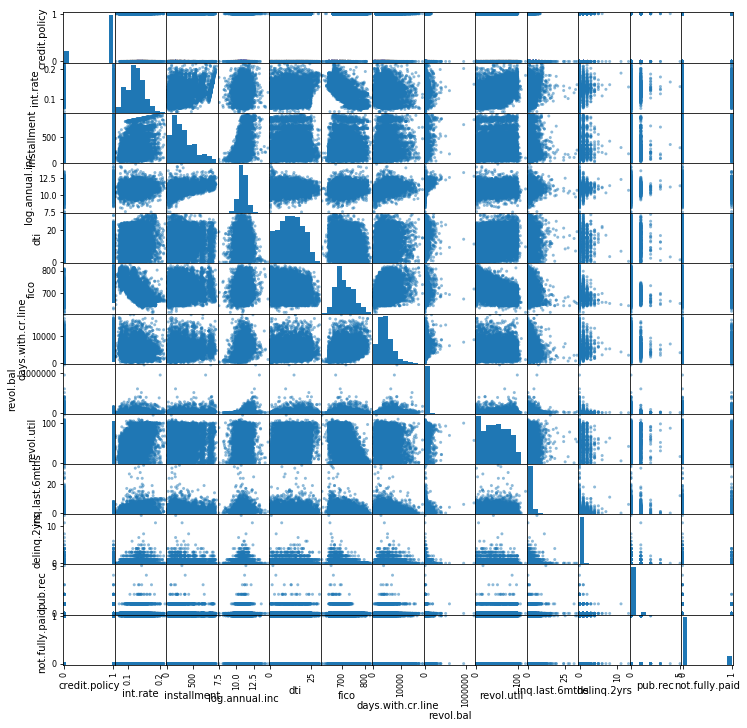

In [13]:
# scatter plot matrix
scatter_matrix(dataset) # 산점도 행렬 확인/ 연속형 변수에 대해 각 쌍을 이뤄 산점도를 그려 한꺼번에 변수 간 관계를 파악
plt.show()

In [14]:
# X_data, y_data division
# 데이터셋 분리 [학습, 검증] 7/3 비율로
from sklearn.model_selection import train_test_split

X = dataset.drop('not.fully.paid', axis = 1) #만약 여러가지 행을 빼고 싶을땐 [] 로 묶어서 빼면 된다.
y = dataset['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)

In [15]:
# Test options and evaluation metric
num_folds = 5 # k fold = 5
num_instances = len(x_train)
seed = 13
scoring = 'accuracy'

In [16]:
# Compare Algorithms - model selection

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

In [17]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_sampl

In [18]:
# cross validaton을 통해 optimal model selection

results = []
names = []
for name, model in models:
    
    kf = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
print(results)

LR: 0.838109 (0.011256)
LDA: 0.836778 (0.011510)
KNN: 0.816290 (0.011539)
CART: 0.750333 (0.015506)
NB: 0.823121 (0.012072)
RF: 0.832946 (0.009090)
SVM: 0.839942 (0.009698)
[array([0.8417985 , 0.8417985 , 0.84346378, 0.81598668, 0.8475    ]), array([0.8376353 , 0.83930058, 0.84263114, 0.81515404, 0.84916667]), array([0.8184846 , 0.82264779, 0.82348043, 0.79350541, 0.82333333]), array([0.76269775, 0.77102415, 0.73688593, 0.72939217, 0.75166667]), array([0.82264779, 0.82681099, 0.82514571, 0.80183181, 0.83916667]), array([0.84096586, 0.83513739, 0.83014155, 0.81681932, 0.84166667]), array([0.84346378, 0.84096586, 0.84013322, 0.82264779, 0.8525    ])]


In [19]:
# pipeline을 활용해서 scaling하고 optimal model selection
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())])))


In [20]:
pipelines

[('ScaledLR', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LR',
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='warn', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      solver='warn', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)), ('ScaledLDA', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LDA',
                   LinearDiscriminantAnalysis(n_components=None, priors=None,
                                              shrinkage=No

In [21]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.838110 (0.010710)
ScaledLDA: 0.836778 (0.011510)
ScaledKNN: 0.822454 (0.010307)
ScaledCART: 0.748001 (0.012043)
ScaledNB: 0.792309 (0.014593)
ScaledRF: 0.831447 (0.010586)
ScaledSVC: 0.839609 (0.011123)


In [22]:

# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVC', SVC())])))

results = []
names = []
for name, model in pipelines:
	kfold = KFold( n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.838943 (0.010368)
ScaledLDA: 0.836778 (0.011510)
ScaledKNN: 0.824286 (0.010601)
ScaledCART: 0.747502 (0.013642)
ScaledNB: 0.792309 (0.014593)
ScaledRF: 0.834778 (0.010932)
ScaledSVC: 0.839942 (0.009698)


In [23]:
# ensemble 과 grid search를 활용한 model selection

n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["sqrt", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.838108 using {'max_features': 'log2', 'n_estimators': 40}


In [24]:
best_RF = RandomForestClassifier(max_features='sqrt', n_estimators=20)
best_RF.fit(x_train, y_train)
best_RF.feature_importances_

array([0.01624609, 0.11056538, 0.1210214 , 0.11579562, 0.11653094,
       0.08414593, 0.12467346, 0.11609791, 0.11404371, 0.05766446,
       0.01393119, 0.00928392])

In [25]:
# GBM 
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')


#시간 측정
start_time = time.time()
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train, y_train)
gb_pred=gb_clf.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 :', gb_accuracy)
print('GBM 수행 시간:', time.time() - start_time)

GBM 정확도 : 0.8418803418803419
GBM 수행 시간: 0.35503315925598145


In [26]:
# GridSearchCV를 이용한 파라미터 optimization..
# 하지만 시간이 많이걸리고 가장 중요한 부분이라.. 각자 센스를 발휘해서 한번 해보자..
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100, 300], 'learning_rate':[0.05, 0.1]}

grid_1 = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_1.fit(x_train, y_train)
print('optimaztion parameter:', grid_1.best_params_)
print('best accuracy : {0:.4f}'.format(grid_1.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s finished


optimaztion parameter: {'learning_rate': 0.05, 'n_estimators': 100}
best accuracy : 0.8381


In [27]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500,
                        learning_rate=0.1)

In [28]:
params = {"base_estimator__criterion" : ["gini", "entropy"],
"base_estimator__max_features" : [7,8],
"base_estimator__max_depth" : [1,2,3,4,5],
"n_estimators": [23,24, 25, 26, 27],
"learning_rate": [0.4, 0.45, 0.5, 0.55, 0.6]
}

In [29]:
grid_2 = GridSearchCV(eclf, param_grid=params, cv=2, verbose=1)
grid_2.fit(x_train, y_train)
print('optimaztion parameter:', grid_2.best_params_)
print('best accuracy : {0:.4f}'.format(grid_2.best_score_))

Fitting 2 folds for each of 500 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


optimaztion parameter: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': 8, 'learning_rate': 0.45, 'n_estimators': 23}
best accuracy : 0.8394


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


In [30]:
# svm grid search
param_grid = {'C': [0.1 ,1 , 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid_3 = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_3.fit(x_train,y_train)
print('optimaztion parameter:', grid_3.best_params_)
print('best accuracy : {0:.4f}'.format(grid_3.best_score_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.840, total=   1.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.9min finished


optimaztion parameter: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
best accuracy : 0.8404


In [31]:
# xgboost
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(x_train, y_train)
y_pred = XGBClassifier.predict(x_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.841


In [35]:
# ExtraTrees
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(x_train, y_train)
y_pred = ExtraTreesClassifier.predict(x_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.831


In [38]:
#ensemble
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('ExtraTrees', ExtraTreesClassifier),
    ('xgboost', XGBClassifier),
    ('svm', grid_3),
    ('adaboost', grid_2),
    ('gbm',grid_1)
],voting='hard')

voting_classifier = voting_classifier.fit(x_train, y_train)

y_pred = voting_classifier.predict(x_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.840, total=   1.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.840, total=   1.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.840, total=   1.5s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.840, total=   1.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.9min finished


Fitting 2 folds for each of 500 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.0s finished


0.841


In [32]:
# final test score - test data

In [39]:
test_data = pd.read_csv('loans_ts.csv')

In [40]:
del test_data['Unnamed: 0']
del test_data['purpose']

In [41]:
x_test = test_data.drop('not.fully.paid', axis = 1) 
y_test = test_data['not.fully.paid']

In [49]:
# test data accuracy confirm

# ensemble model
y_pred = voting_classifier.predict(x_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.835


In [50]:
y_pred = ExtraTreesClassifier.predict(x_test)
ex_tree_accy = round(accuracy_score(y_pred, y_test), 3)
print(ex_tree_accy)

0.834


In [51]:
y_pred = XGBClassifier.predict(x_test)
xgb_accy = round(accuracy_score(y_pred, y_test), 3)
print(xgb_accy)

0.834


In [52]:
y_pred = grid_3.predict(x_test)
svm_accy = round(accuracy_score(y_pred, y_test), 3)
print(svm_accy)

0.835


In [53]:
y_pred = grid_2.predict(x_test)
adaboost_accy = round(accuracy_score(y_pred, y_test), 3)
print(adaboost_accy)

0.836


In [54]:
y_pred = grid_1.predict(x_test)
gbm_accy = round(accuracy_score(y_pred, y_test), 3)
print(gbm_accy)

0.834
